In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data_train = pd.read_csv('C:\\Users\\Pc\\Downloads\\data-science-practice-master\\data-science-practice-master\\data\\Train_BigmartSale.csv')
data_test = pd.read_csv('C:\\Users\\Pc\\Downloads\\data-science-practice-master\\data-science-practice-master\\data\\Test_BigmartSale.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
data_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
combined_data = data_train.append(data_test).copy()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
data_train.shape

(8523, 12)

In [11]:
data_test.shape

(5681, 11)

In [12]:
combined_data.shape

(14204, 12)

In [13]:
combined_data.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [14]:
combined_data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')

# Feature Scaling

In [15]:
cols_txt = combined_data.select_dtypes(include='object').columns
cols_txt

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [16]:
combined_data[cols_txt].nunique()

Item_Fat_Content           5
Item_Identifier         1559
Item_Type                 16
Outlet_Identifier         10
Outlet_Location_Type       3
Outlet_Size                3
Outlet_Type                4
dtype: int64

In [13]:
combined_data.drop('Item_Identifier',axis=1,inplace=True)

In [17]:
cols_txt = combined_data.select_dtypes(include='object').columns
cols_txt
col1 = list(combined_data[cols_txt].isnull().sum()[combined_data[cols_txt].isnull().sum()>0].index)
col1

['Outlet_Size']

In [23]:
combined_data['Outlet_Size'].value_counts().index[0]

'Medium'

In [25]:
b1=[]
for i in col1:
    b1 = combined_data[i].value_counts().index
    combined_data[i].fillna(b1[0],inplace=True)
    

In [26]:
combined_data[cols_txt].isnull().sum()

Item_Fat_Content        0
Item_Identifier         0
Item_Type               0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Size             0
Outlet_Type             0
dtype: int64

Remove the NA values from the integer and float column

In [28]:
cols_int = combined_data.select_dtypes(include=['float','integer']).columns
cols_int

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')

In [29]:
col2 = list(combined_data[cols_int].isnull().sum()[combined_data[cols_int].isnull().sum()>0].index)
col2

['Item_Weight']

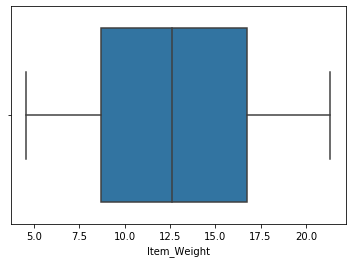

In [31]:
import seaborn as sns
sns.boxplot(combined_data['Item_Weight'])


In [20]:
#outliears are not there 

In [32]:
combined_data['Item_Weight'].fillna(combined_data['Item_Weight'].mean(),inplace=True)


In [33]:
combined_data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

Analysi the correlation 

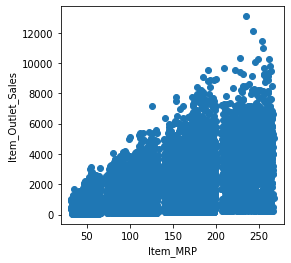

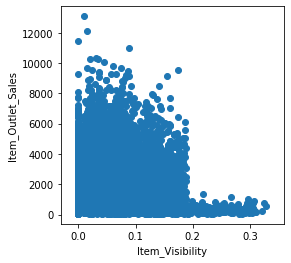

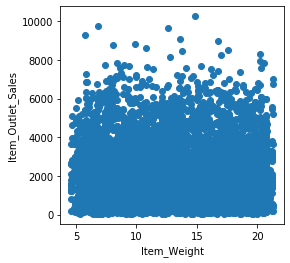

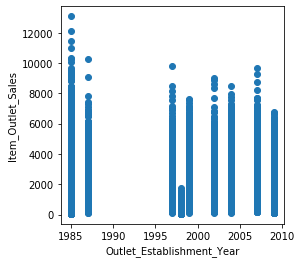

In [34]:
for i in cols_int:
    plt.figure(figsize=(4,4))
    plt.scatter(data_train[i],data_train['Item_Outlet_Sales'])
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    

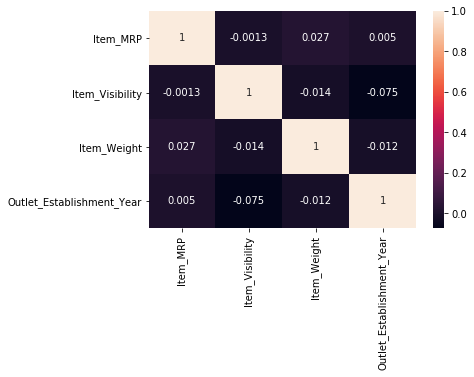

In [39]:
cor = data_train[cols_int].corr()
sns.heatmap(cor,annot=True)
plt.show()
#cor[abs(cor)>0.5]


Convert the target data into normal distribution

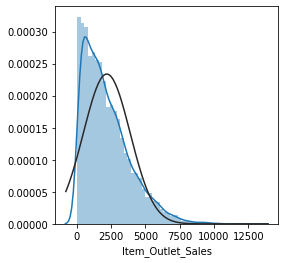

In [25]:
from scipy import stats
plt.figure(figsize=(4,4))
sns.distplot(data_train['Item_Outlet_Sales'],fit = stats.norm)

In [26]:
data_train['Item_Outlet_Sales'] = np.log1p(data_train['Item_Outlet_Sales'])

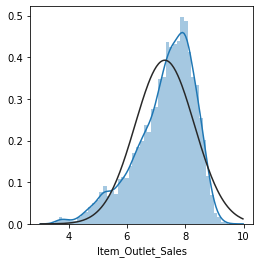

In [27]:
plt.figure(figsize=(4,4))
sns.distplot(data_train['Item_Outlet_Sales'],fit=stats.norm)
plt.show()

# Feature Engineering

In [28]:
combined_data = pd.get_dummies(combined_data,columns=cols_txt)


# Model Fitting

1.Linear Regression

In [29]:
X = combined_data[:data_train.shape[0]].values
Y = data_train['Item_Outlet_Sales'].values
test = combined_data[data_train.shape[0]:].values

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train,Y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
r2_score(y_pred,Y_test)

0.619483090303445

In [35]:
rmse = np.sqrt(mean_squared_error(y_pred,Y_test))

In [96]:
rmse

0.5326048766293933

In [94]:
#import statsmodels.api as sm
#X_opt = combined_data[:data_train.shape[0]].iloc[:,[0,1,2,3]].values
#X2 = sm.add_constant(X_opt) 
#y = round(data_train['Item_Outlet_Sales']).values
#est = sm.OLS(y,X2)
#est2 = est.fit()

In [97]:
#est2.summary()

2.Decision Tree

In [139]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 5,random_state = 42)
model = model.fit(X_train,Y_train)

In [140]:
y_pred = model.predict(X_test)

In [141]:
model.score(X_test,Y_test)

0.7344297470801284

In [142]:
rmse = np.sqrt(mean_squared_error(y_pred,Y_test))
rmse

0.5283992021963458

In [143]:
r2_score(y_pred,Y_test)

0.6353123700713585

3. Random Forest

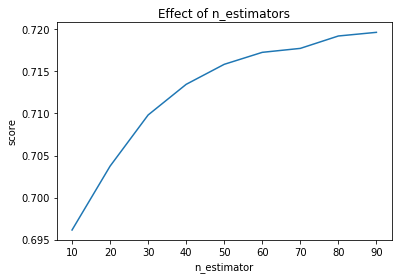

In [148]:
from sklearn.ensemble import RandomForestRegressor
estimators = range(10,100,10)
score = []
for i in estimators:
    model = RandomForestRegressor(n_estimators=i,random_state=42)
    model = model.fit(X_train,Y_train)
    score.append(model.score(X_test,Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators,score)


In [149]:
model = RandomForestRegressor(n_estimators= 90,random_state=42)
model = model.fit(X_train,Y_train)
    

In [150]:
y_pred = model.predict(X_test)

In [155]:
rmse = np.sqrt(mean_squared_error(y_pred,Y_test)) 

In [156]:
rmse

0.5429139785813244

In [157]:
from sklearn.feature_selection import RFE
rfe = RFE(model,10)
rfe = rfe.fit(X_train,Y_train)

In [158]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True])

In [166]:
importance = model.feature_importances_
indices = np.argsort(importance)


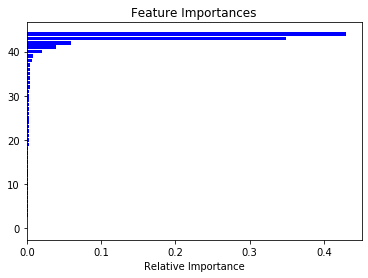

In [168]:
plt.title('Feature Importances')
plt.barh(range(len(indices)),importance[indices],color='b',align='center')
plt.xlabel('Relative Importance')
plt.show()

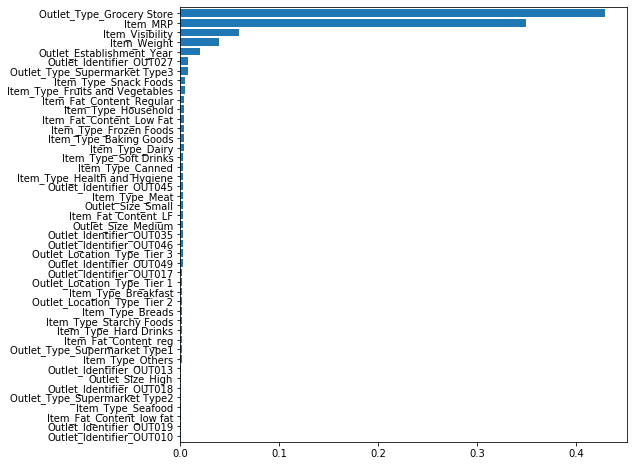

In [179]:
X = combined_data[:data_train.shape[0]]
plt.figure(figsize=(8,8))
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)